In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
np.set_printoptions(suppress=True)

# Load Data

In [5]:
df_customers = pd.read_csv("../data/raw/customers.csv")
df_loans = pd.read_csv("../data/raw/loans.csv")
df_bureau = pd.read_csv("../data/raw/bureau_data.csv")

In [6]:
df_customers.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001


In [7]:
df_loans.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.00,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.00,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [8]:
df_bureau.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58
3,C00004,3,0,115,15,87,5,26
4,C00005,4,2,120,0,0,5,10


In [9]:
df = pd.merge(df_customers, df_loans, on='cust_id')

In [10]:
df = pd.merge(df, df_bureau, on='cust_id')

In [11]:
# check that you have all the information and understand the general structure of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [12]:
X = df.drop("default", axis=1)
y = df["default"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)
df_train.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
27434,C27435,45,F,Single,Salaried,1131000,0,Owned,5,Ahmedabad,...,2022-04-21,2022-05-21,4,2,90,6,33,8,59,False
13400,C13401,29,M,Single,Salaried,2343000,0,Owned,25,Delhi,...,2020-11-24,2020-12-11,3,1,119,4,17,4,92,False
883,C00884,50,F,Single,Self-Employed,2891000,0,Mortgage,29,Lucknow,...,2019-08-25,2019-09-19,2,1,83,14,78,4,83,False
7303,C07304,43,F,Single,Self-Employed,272000,1,Owned,27,Bangalore,...,2020-04-16,2020-05-05,1,1,37,0,0,5,34,False
45124,C45125,31,F,Single,Salaried,141000,0,Owned,27,Jaipur,...,2024-01-26,2024-02-17,2,0,62,6,28,5,19,False


# Data Cleaning: Handling Missing and Duplicate Values

In [14]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 48
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [16]:
mode_residence = df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [17]:
# We don't see the tests data and fill up na values in accordance with the train data set
df_train.residence_type.fillna(mode_residence, inplace=True)
df_test.residence_type.fillna(mode_residence, inplace=True)

/var/folders/bl/03dn4k0933q6q1tsklj_xsyr0000gn/T/ipykernel_17342/3573807240.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.residence_type.fillna(mode_residence, inplace=True)
/var/folders/bl/03dn4k0933q6q1tsklj_xsyr0000gn/T/ipykernel_17342/3573807240.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

In [18]:
df_train.isna().sum()

cust_id                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_co

In [19]:
# Handle duplicate values
df_train.duplicated().sum()

np.int64(0)

In [20]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [21]:
df_train.describe()

,age,income,number_of_dependants,years_at_current_address,zipcode,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
count,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00
mean,39.56,2636054.83,1.94,15.99,418768.57,4706706.56,4002796.64,80724.11,720503.40,3202237.31,25.90,1336077.19,987467.44,2.50,1.00,76.00,4.89,26.94,5.00,43.33
std,9.85,2624140.92,1.54,8.94,168831.82,6288692.94,5400902.41,120830.65,972162.43,4320721.92,12.42,1213733.93,1045108.58,1.12,0.82,43.71,5.86,32.93,2.02,29.36
min,18.00,0.00,0.00,1.00,110001.00,0.00,0.00,0.00,0.00,0.00,6.00,-1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00
25%,33.00,803000.00,0.00,8.00,302001.00,1136000.00,959000.00,19180.00,172620.00,767200.00,16.00,423931.00,286189.50,1.00,0.00,42.00,0.00,0.00,4.00,18.00
50%,40.00,1884000.00,2.00,16.00,400001.00,2651000.00,2234000.00,44700.00,402120.00,1787200.00,24.00,1000881.50,666825.00,2.00,1.00,71.00,3.00,14.00,5.00,39.00
75%,46.00,3332000.00,3.00,24.00,560001.00,5159000.00,4597250.00,92000.00,827505.00,3677800.00,35.00,1789091.75,1236740.50,3.00,2.00,107.00,9.00,46.00,6.00,67.00
max,70.00,11999000.00,5.00,31.00,700001.00,52175000.00,47667000.00,5698029.90,8580060.00,38133600.00,59.00,5000000.00,7846643.00,4.00,2.00,223.00,24.00,171.00,9.00,99.00


In [41]:
columns_continuous = ['age', 'income', 'number_of_dependants', 'years_at_current_address',
                      'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement',
                      'loan_tenure_months','principal_outstanding', 'bank_balance_at_application',
                      'number_of_open_accounts','number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
                       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

columns_categorical = ['gender', 'marital_status', 'employment_status', 'residence_type', 'city',
                       'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']

# Visualize Outliers

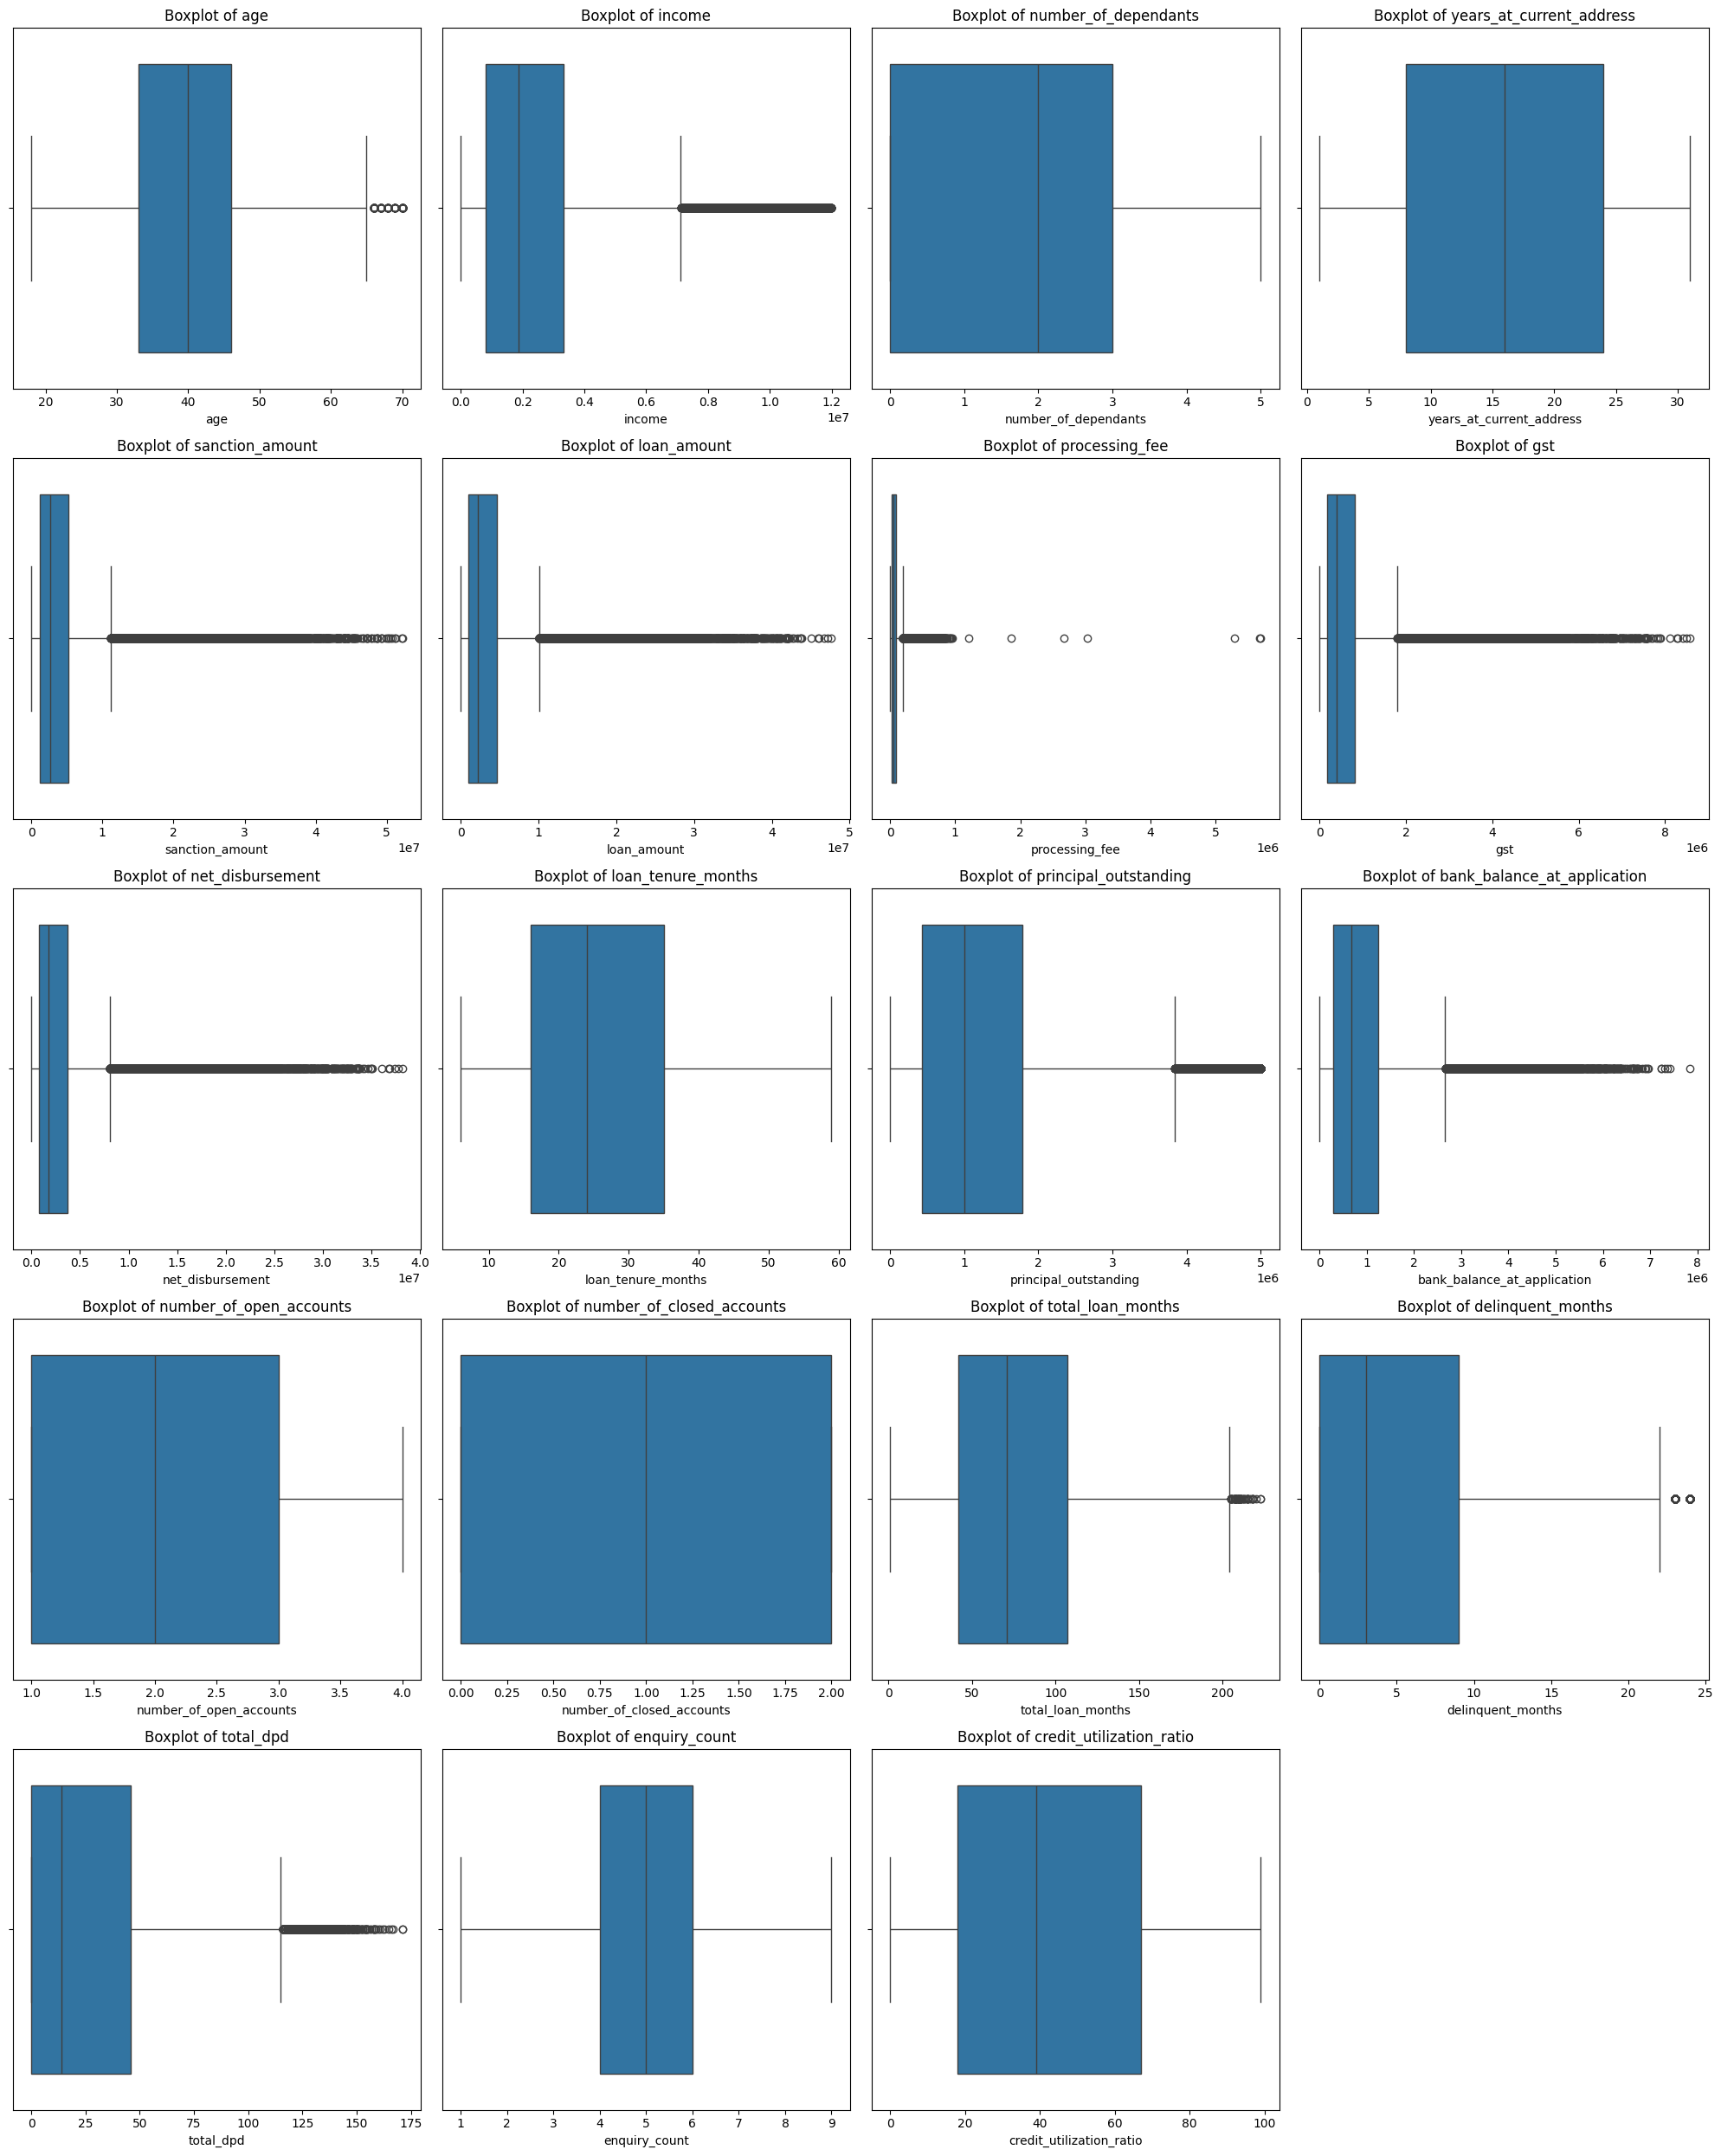

In [43]:
n_cols = 4
n_total = len(columns_continuous)
n_rows = (n_total + n_cols - 1) // n_cols  # ceiling without math

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(columns_continuous):
    sns.boxplot(data=df_train, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

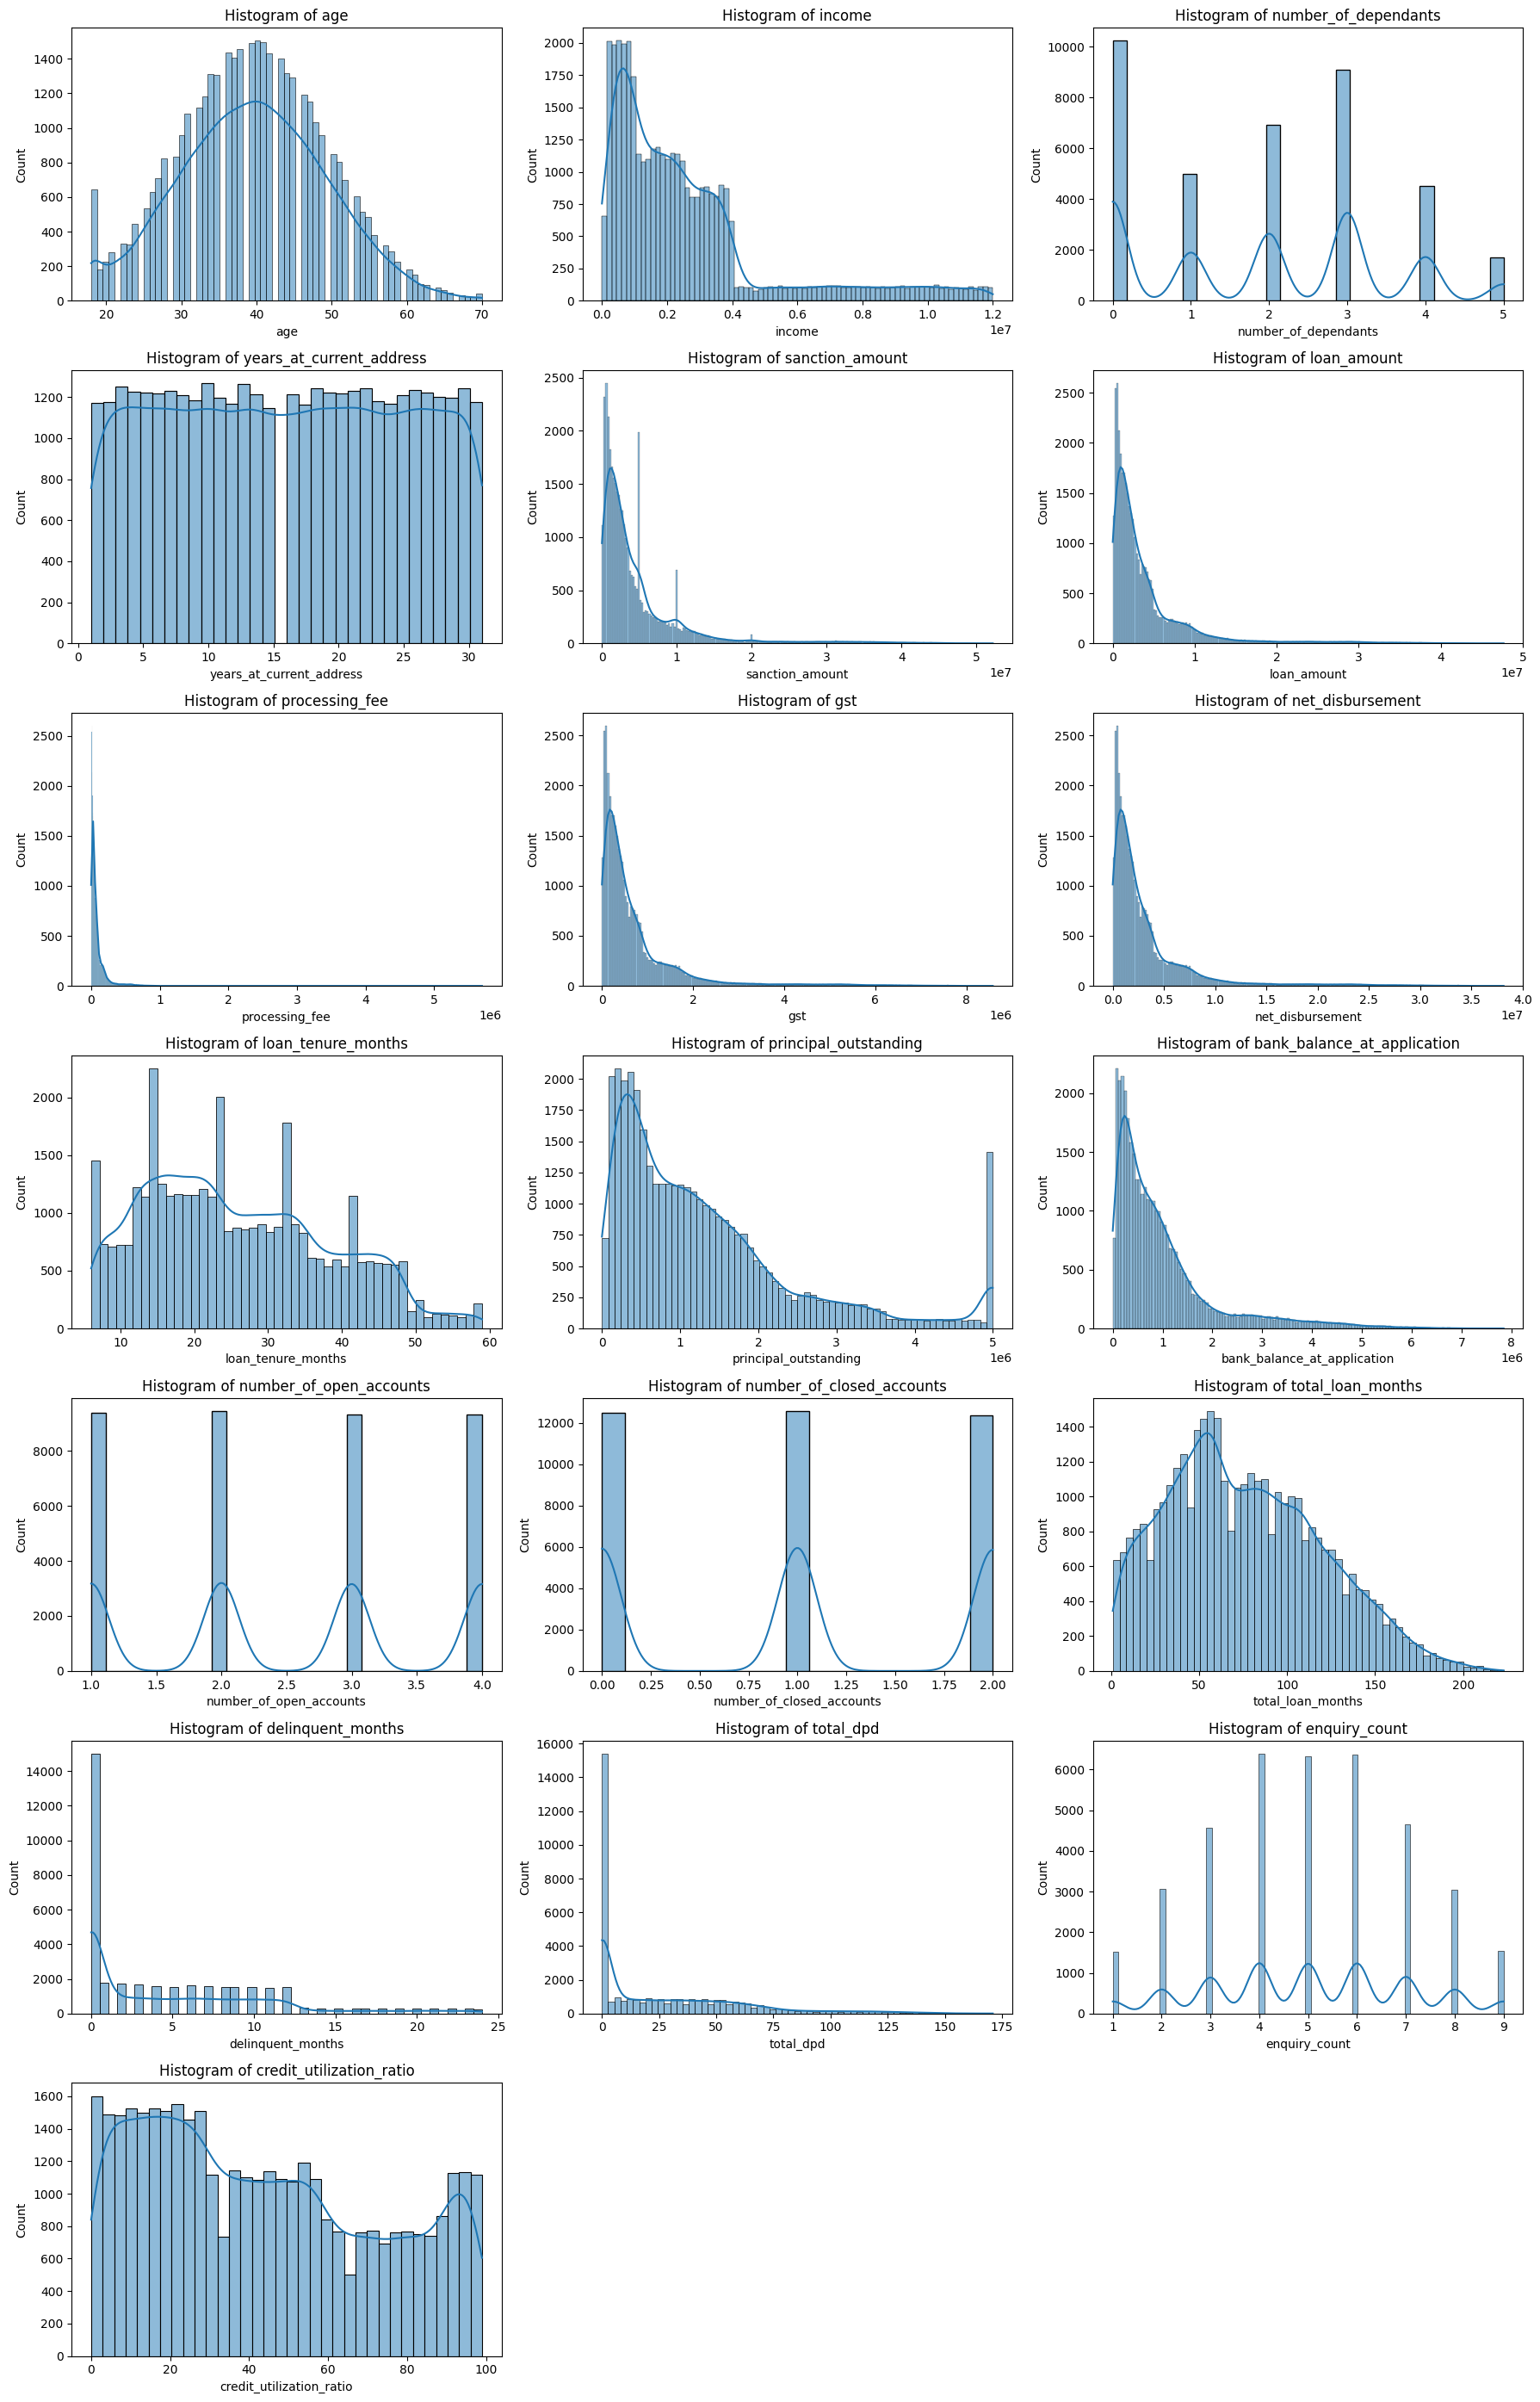

In [44]:
n_cols = 3
n_total = len(columns_continuous)
n_rows = (n_total + n_cols - 1) // n_cols  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(columns_continuous):
    sns.histplot(data=df_train, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {col}')

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Variable Distribution & Outlier Analysis

As part of the data exploration for our credit risk model, we performed a comprehensive analysis of all continuous numerical variables using boxplots and histograms to identify the shape of each distribution and spot potential outliers.

## Key Observations

### 1. Expected Skewness & Outliers
Many financial variables are right-skewed, which aligns with domain expectations:
- Loan amounts, sanctioned amounts, net disbursement, and principal outstanding naturally have long tails — most borrowers take moderate loans, but a few take very large ones.
- Income and bank balance at application also follow this pattern.

These skewed distributions come with visible outliers, but they are likely valid due to the inherent variance in customer financial profiles.

### 2. Expected Relationships Confirmed
Some variable relationships appear logically consistent:
- Higher loan amounts generally correlate with higher sanctioned amounts, principal outstanding, and net disbursement.
- Delinquent months and total DPD (Days Past Due) mostly concentrate near zero, indicating that most borrowers are timely, with a minority being chronic defaulters.

### 3. Suspicious or Illogical Patterns
However, we also identified some inconsistencies that warrant deeper investigation:

#### Processing Fees
- Processing fee should scale with loan amount, yet its distribution is oddly symmetric and centralized, unlike the strongly right-skewed loan amount distribution.
- This suggests that many high processing fees do not correspond to high loan amounts, breaking a domain expectation.
- Likely cause: data entry errors, fixed-fee entries, or erroneous scale (e.g., ₹100k instead of ₹10k).

Actionable: These entries should be flagged and validated against the corresponding loan amounts. Consider removing or imputing based on loan tiers.

### Final Thoughts
While many of the outliers are valid, certain variables — especially those not aligning with natural relationships (like `processing_fee`) — raise red flags. Cleaning these will directly improve model robustness, interpretability, and risk predictiveness.

We recommend incorporating these findings into the next phase of data validation, feature engineering, and business rule alignment.



In [46]:
# From business perspective, we can remove outliers from the processing fee
# We know processing fees are capped at 3% of the loan amount

# analyze rows where the processing fee is more than 3% of the loan amount
df_train[df_train.processing_fee/df_train.loan_amount > 0.03].head()


,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
23981,C23982,33,F,Single,Self-Employed,1790000,0,Rented,7,Kolkata,...,2021-12-15,2022-01-14,4,2,154,9,31,6,26,False
9898,C09899,56,M,Married,Self-Employed,8948000,5,Owned,16,Ahmedabad,...,2020-07-19,2020-08-11,2,1,51,1,5,3,92,False
47089,C47090,37,M,Married,Self-Employed,1892000,2,Rented,13,Jaipur,...,2024-04-07,2024-04-15,3,0,112,5,33,3,32,False
33705,C33706,54,M,Married,Self-Employed,10763000,2,Mortgage,5,Ahmedabad,...,2022-12-05,2022-12-30,3,1,140,0,0,5,47,False
12294,C12295,49,M,Married,Salaried,3504000,2,Rented,24,Ahmedabad,...,2020-10-15,2020-10-23,1,2,58,0,0,3,86,False


In [50]:
# we can remove these rows from the training and test set because there are very few records that are wierd like this
df_train_1 = df_train[df_train.processing_fee/df_train.loan_amount <= 0.03].copy()
df_test_1 = df_test[df_test.processing_fee/df_test.loan_amount <= 0.03].copy()

In [49]:
df_train_1.shape, df_test_1.shape

((37487, 33), (12498, 33))

In [52]:
# analyze categorical variables
for col in columns_categorical:
    print(f"{col} -->", df_train_1[col].unique())

gender --> ['F' 'M']
marital_status --> ['Single' 'Married']
employment_status --> ['Salaried' 'Self-Employed']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Ahmedabad' 'Delhi' 'Lucknow' 'Bangalore' 'Jaipur' 'Hyderabad' 'Kolkata'
 'Pune' 'Chennai' 'Mumbai']
state --> ['Gujarat' 'Delhi' 'Uttar Pradesh' 'Karnataka' 'Rajasthan' 'Telangana'
 'West Bengal' 'Maharashtra' 'Tamil Nadu']
zipcode --> [380001 110001 226001 560001 302001 500001 700001 411001 600001 400001]
loan_purpose --> ['Home' 'Auto' 'Personal' 'Education' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
default --> [False  True]


In [53]:
# Replace the odd values in the categorical variables
df_train_1["loan_purpose"] = df_train_1["loan_purpose"].replace({"Personaal": "Personal"})
df_test_1["loan_purpose"] = df_test_1["loan_purpose"].replace({"Personaal": "Personal"})

In [54]:
print(f"loan_purpose -->", df_train_1["loan_purpose"].unique())

loan_purpose --> ['Home' 'Auto' 'Personal' 'Education']


# Exploratory Data Analysis (EDA)

In [56]:
columns_continuous

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

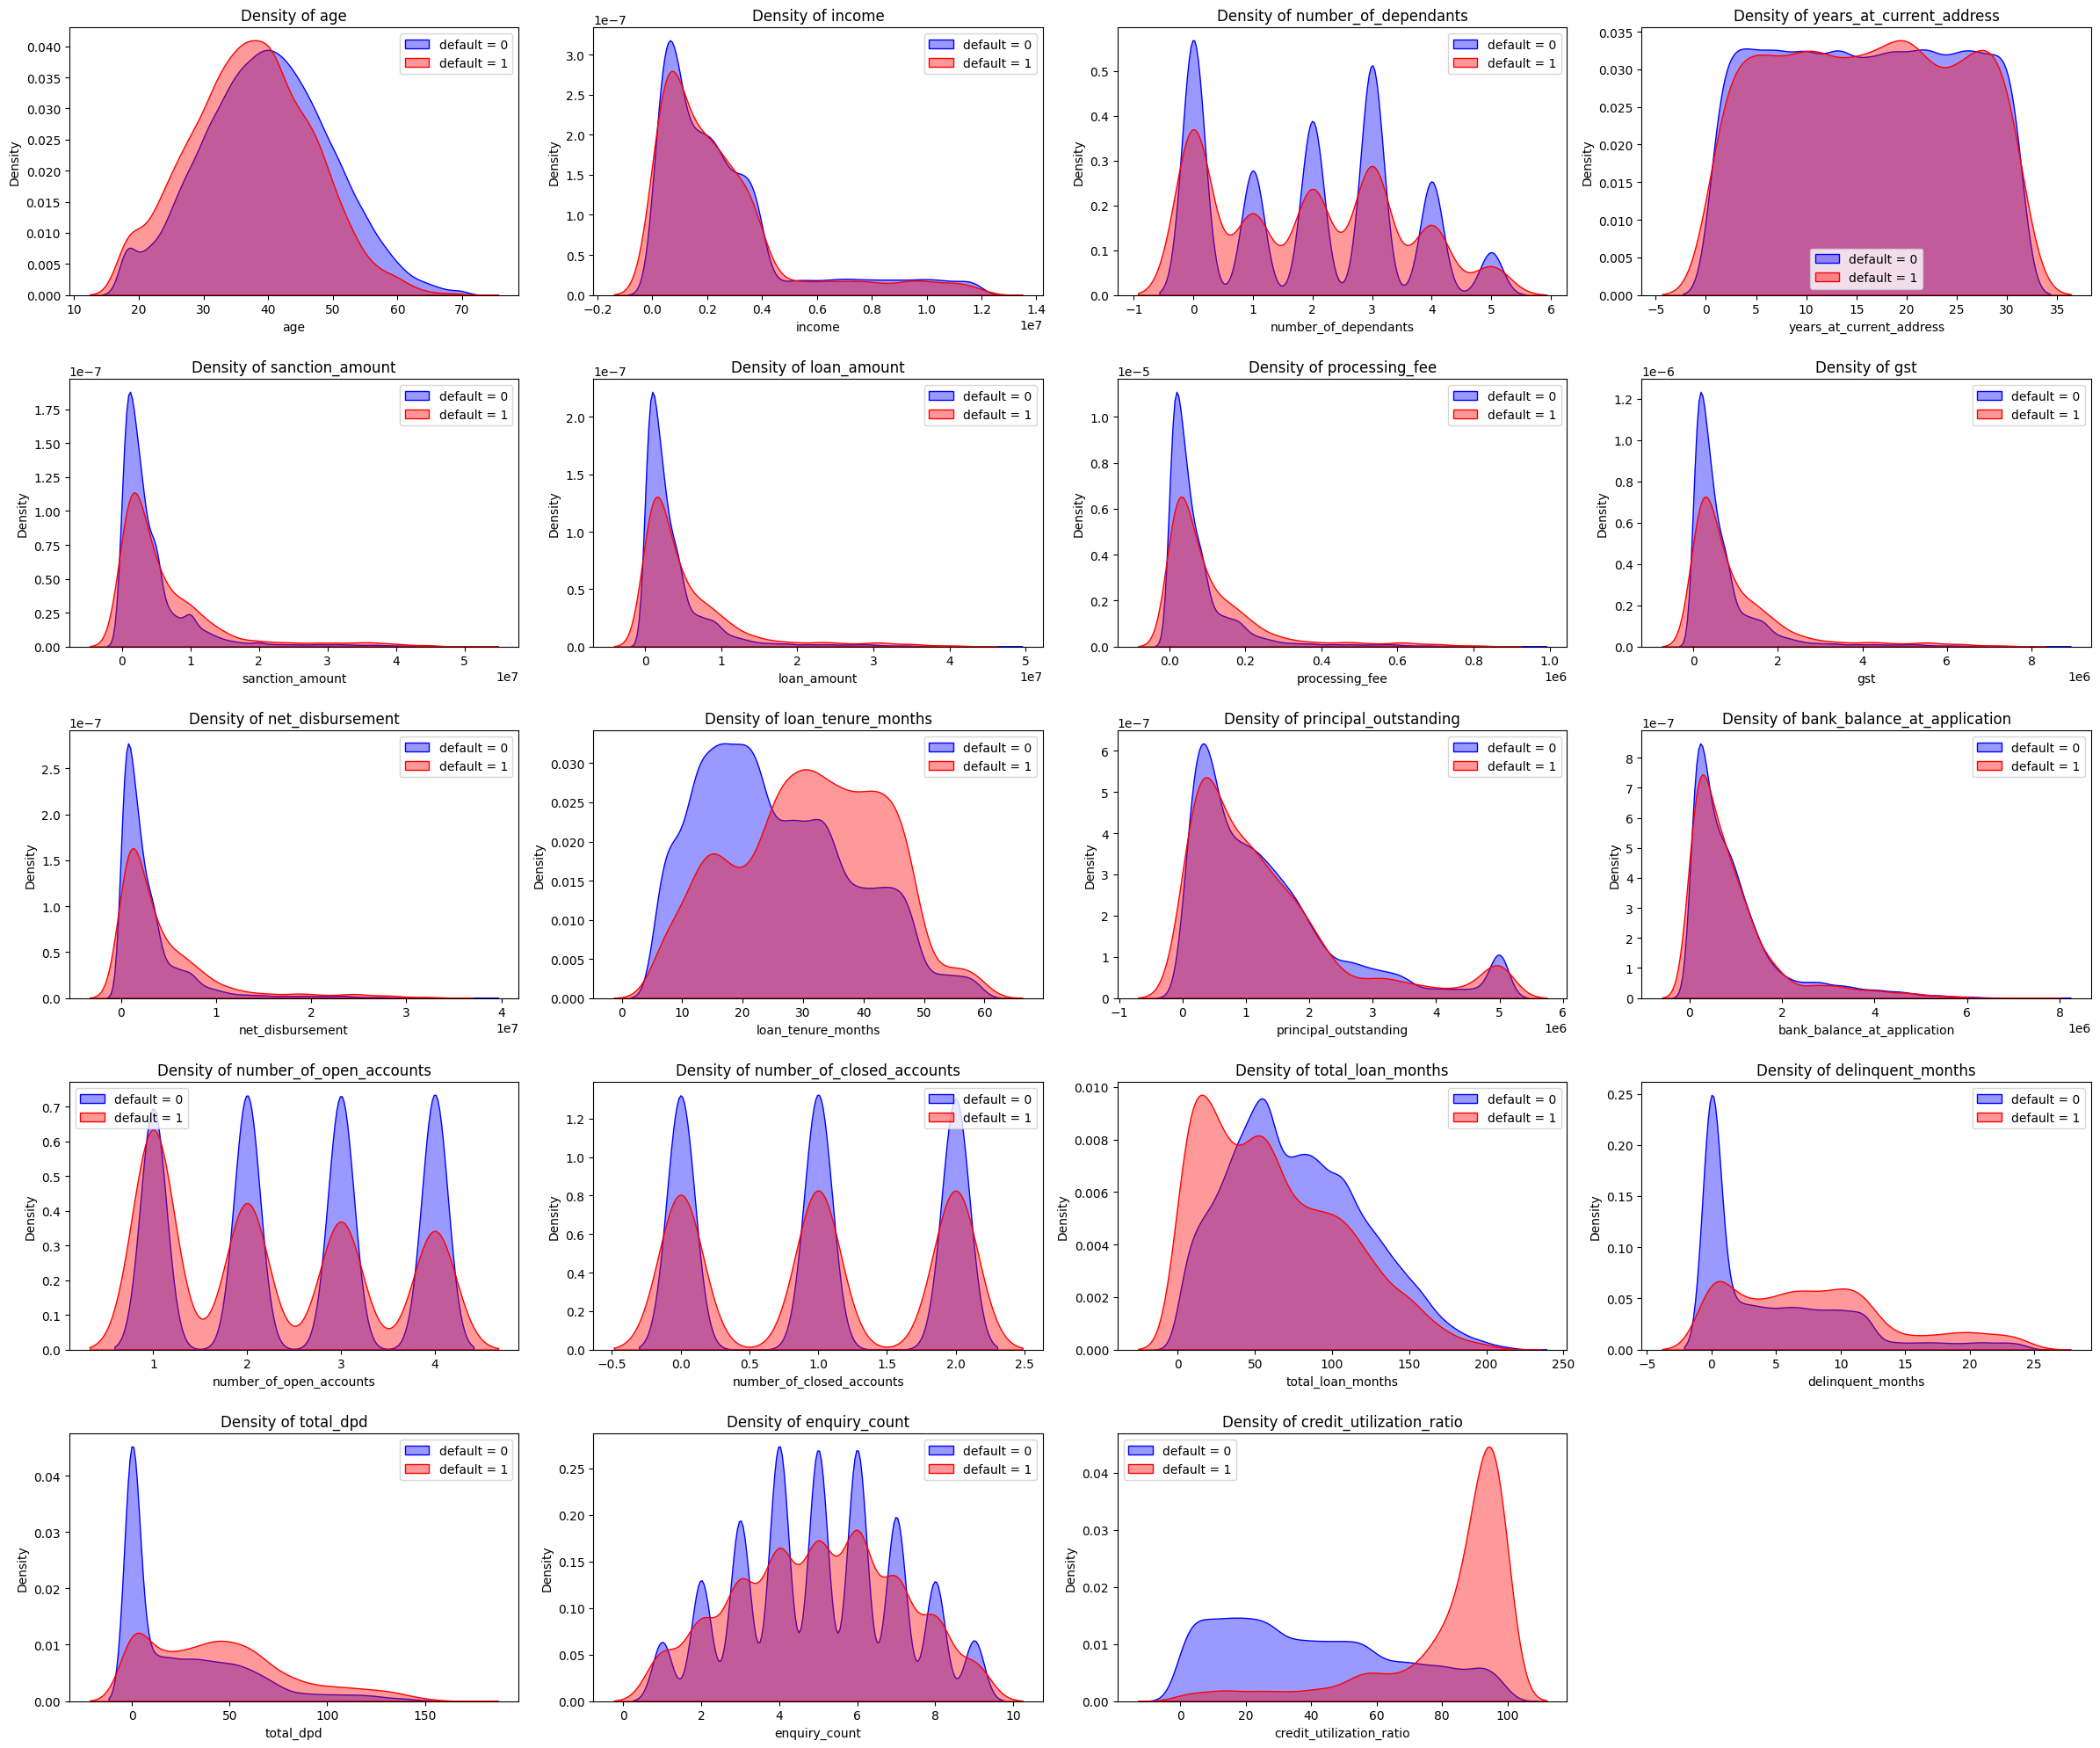

In [58]:
n_cols = 4
n_total = len(columns_continuous)
n_rows = (n_total + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(columns_continuous):
    sns.kdeplot(df_train_1[df_train_1.default == 0][col], label='default = 0', color='blue', ax=axes[i], fill=True, alpha=0.4)
    sns.kdeplot(df_train_1[df_train_1.default == 1][col], label='default = 1', color='red', ax=axes[i], fill=True, alpha=0.4)
    axes[i].set_title(f'Density of {col}')
    axes[i].legend()

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Comparative Distribution Insights: Defaulters vs Non-Defaulters

This analysis explores the distributional differences in continuous variables between defaulters (`default = 1`) and non-defaulters (`default = 0`) using KDE-based density plots. By isolating shifts in distributions, we aim to mathematically characterize patterns that are strongly associated with default behavior.

## Age
- The age distribution of defaulters is notably **left-shifted** compared to non-defaulters.
- **Interpretation**: Younger individuals are statistically more likely to default. This could be attributed to less stable employment, limited credit history, or riskier financial behavior.

## Credit Utilization Ratio
- Defaulters display a **significantly right-skewed** distribution in credit utilization ratio.
- **Interpretation**: Individuals who default tend to use a higher proportion of their available credit, which aligns with established credit risk theory indicating higher utilization is correlated with increased likelihood of default.

## Income
- Defaulters exhibit a strong **left-skew** in income compared to non-defaulters.
- **Interpretation**: Lower income borrowers have higher default rates, consistent with constrained financial flexibility and lower ability to absorb financial shocks.

## Processing Fee
- The distribution of processing fees is unexpectedly similar between defaulters and non-defaulters, with a mild left-shift for defaulters.
- **Interpretation**: Although both groups are charged similar processing fees in aggregate, further stratified analysis may be needed, particularly due to known anomalies in the processing_fee feature.

## Number of Dependents
- Defaulters tend to have a slightly **higher number of dependents**.
- **Interpretation**: Increased financial obligations associated with more dependents may contribute to a higher risk of default.

## Loan Amount, Sanction Amount, Net Disbursement, and Principal Outstanding
- Across these financial variables, defaulters tend to cluster more toward the **lower and middle ranges**, with fewer individuals holding extremely large loan values.
- **Interpretation**: While high loan amounts do not directly imply higher default rates, individuals with moderate loan sizes may reflect riskier profiles when combined with lower income or high utilization.

## Bank Balance at Application
- The distribution is **left-shifted** for defaulters, meaning they tend to have less liquidity at the time of application.
- **Interpretation**: Lower cash reserves correlate with diminished capacity to buffer against loan repayment shocks.

## Loan Tenure and Total Loan Months
- Defaulters tend to exhibit slightly **shorter loan tenure and durations**.
- **Interpretation**: Short-term loans may reflect aggressive repayment structures or riskier credit instruments. Alternatively, defaulters may be over-represented in short-duration lending products.

## Delinquent Months and Total DPD
- As expected, defaulters have density concentrated at **higher delinquency and DPD values**.
- **Interpretation**: These variables are inherently predictive and show clear separation between the two groups, justifying their inclusion in the model.

## Number of Open/Closed Accounts and Enquiry Count
- Defaulters show a **higher frequency of recent credit enquiries** and **slightly more closed accounts**.
- **Interpretation**: A high enquiry count may indicate financial distress or credit-seeking behavior, which is a common red flag in credit scoring.

## Years at Current Address
- Both groups have similar distributions, suggesting that residential stability is not a strong differentiator in this dataset.

---

## Summary of Key Risk Markers
| Feature | Risk Pattern for Defaulters |
|---------|-----------------------------|
| Age | Skews younger |
| Credit Utilization Ratio | Higher utilization |
| Income | Lower income levels |
| Bank Balance | Lower reserves at application |
| Enquiry Count | More frequent credit enquiries |
| Delinquency Metrics | Concentrated at higher values |

These insights are directly actionable for refining feature engineering, risk scoring models, and business rule design. Further analysis may explore nonlinear relationships, interaction effects, and thresholds for decisioning.



# Feature Engineering

In [71]:
# From business understanding, create loan to income ratio
df_train_1["loan_to_income"] = df_train_1["loan_amount"] / df_train_1["income"]
df_test_1["loan_to_income"] = df_test_1["loan_amount"] / df_test_1["income"]
df_train_1["loan_to_income"].describe()

count   37487.00
mean        1.55
std         0.97
min         0.30
25%         0.77
50%         1.16
75%         2.45
max         4.57
Name: loan_to_income, dtype: float64

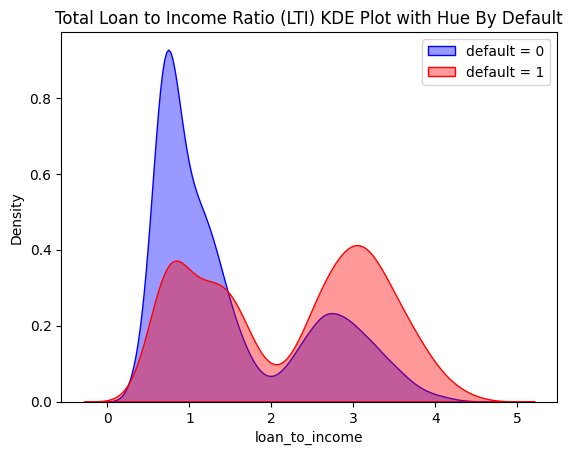

In [69]:
sns.kdeplot(df_train_1[df_train_1.default == 0]["loan_to_income"], label='default = 0', color='blue', fill=True, alpha=0.4)
sns.kdeplot(df_train_1[df_train_1.default == 1]["loan_to_income"], label='default = 1', color='red', fill=True, alpha=0.4)

plt.title('Total Loan to Income Ratio (LTI) KDE Plot with Hue By Default')
plt.legend()
plt.show()

In [73]:
df_train_1["delinquency_ratio"] = df_train_1["delinquent_months"]*100 / df_train_1["total_loan_months"]
df_test_1["delinquency_ratio"] = df_test_1["delinquent_months"]*100 / df_test_1["total_loan_months"]
df_train_1[["delinquent_months", "total_loan_months", "delinquency_ratio"]].sample(3)

,delinquent_months,total_loan_months,delinquency_ratio
32104,21,68,30.88
16445,0,74,0.00
3278,5,37,13.51


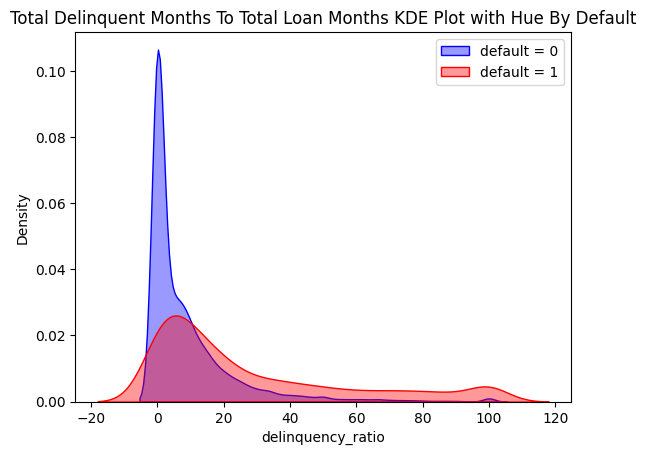

In [74]:
col = "delinquency_ratio"

sns.kdeplot(df_train_1[df_train_1.default == 0][col], label='default = 0', color='blue', fill=True, alpha=0.4)
sns.kdeplot(df_train_1[df_train_1.default == 1][col], label='default = 1', color='red', fill=True, alpha=0.4)

plt.title('Total Delinquent Months To Total Loan Months KDE Plot with Hue By Default')
plt.legend()
plt.show()

In [77]:
df_train_1['avg_dpd_per_delinquency'] = np.where(
    df_train_1['delinquent_months'] != 0,
    (df_train_1['total_dpd'] / df_train_1['delinquent_months']).round(1),
    0
)

df_test_1['avg_dpd_per_delinquency'] = np.where(
    df_test_1['delinquent_months'] != 0,
    (df_test_1['total_dpd'] / df_test_1['delinquent_months']).round(1),
    0
)

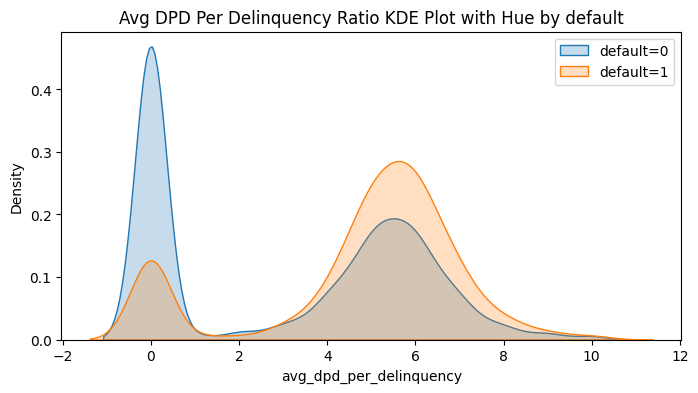

In [76]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Avg DPD Per Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

# Analysis of Ratio-Based Features by Default Status

## 1. Loan to Income Ratio (LTI)

- **Observation**: The distribution of `loan_to_income` is distinctly bimodal for defaulters, with a heavier presence in the 2.5–3.5 range, whereas non-defaulters cluster strongly around 0.5–1.0.
- **Interpretation**: Borrowers with higher loan-to-income ratios are significantly more likely to default. This confirms the importance of LTI as a proxy for repayment burden — the higher the ratio, the more strained the borrower's income is relative to their debt obligations.
- **Implication**: Incorporating LTI thresholds or continuous weighting in the model is strongly recommended.

## 2. Delinquency Ratio (Total Delinquent Months / Total Loan Months)

- **Observation**: Non-defaulters exhibit a sharp peak near 0, indicating very few or no delinquent months. In contrast, defaulters have a broad distribution that stretches far to the right, with many instances having delinquency ratios above 20%.
- **Interpretation**: This ratio directly captures chronic payment issues. A high delinquency ratio strongly correlates with default status and is a clear risk signal.
- **Implication**: This feature is highly predictive. Consider it for direct threshold-based rejection or risk tiering in production scoring systems.

## 3. Average DPD per Delinquency (avg_dpd_per_delinquency)

- **Observation**: Defaulters display a unimodal density centered around 5–6 days, whereas non-defaulters are concentrated near 0. This indicates defaulters not only have more delinquencies but also longer delays per incident.
- **Interpretation**: The average delay duration per delinquency incident is materially higher for defaulters, indicating not just occurrence but severity of non-compliance.
- **Implication**: This feature adds granularity to delinquency-based metrics, distinguishing borrowers who are occasionally late versus consistently and significantly overdue.

---

## Summary Table of Findings

| Feature | Key Pattern in Defaulters | Recommended Use |
|--------|----------------------------|-----------------|
| Loan to Income Ratio | Shifted right; bimodal | Risk score feature, threshold-based filters |
| Delinquency Ratio | High values prevalent | Direct inclusion in model and rejection rules |
| Avg DPD per Delinquency | Centered around 5–6 | Severity marker for delinquency risk |

These variables exhibit meaningful separation and high interpretability, making them ideal candidates for inclusion in both statistical and machine learning-based credit risk models.

Further steps include statistical validation (e.g., KS-test), correlation analysis with other predictors, and assessing impact on model performance via feature importance scores.



## Feature Selection

In [78]:
df_train_2 = df_train_1.drop(['cust_id', 'loan_id'],axis="columns")
df_test = df_test_1.drop(['cust_id', 'loan_id'],axis="columns")

### Drop Columns that Business Asked Us to Drop

In [79]:
df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income',
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_test = df_test.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income',
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [80]:
df_train_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37487 entries, 27434 to 15795
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37487 non-null  int64  
 1   gender                       37487 non-null  object 
 2   marital_status               37487 non-null  object 
 3   employment_status            37487 non-null  object 
 4   number_of_dependants         37487 non-null  int64  
 5   residence_type               37487 non-null  object 
 6   years_at_current_address     37487 non-null  int64  
 7   city                         37487 non-null  object 
 8   state                        37487 non-null  object 
 9   zipcode                      37487 non-null  int64  
 10  loan_purpose                 37487 non-null  object 
 11  loan_type                    37487 non-null  object 
 12  sanction_amount              37487 non-null  int64  
 13  processing_fee   

In [81]:
X_train = df_train_3.drop("default", axis=1)
y_train = df_train_3["default"]

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = df_train_3.select_dtypes(["int64","float64"]).columns

scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()


,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00
mean,0.41,0.39,0.50,0.52,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.49,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.33,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.10,0.55,0.35,0.16,0.67,1.00,0.62,0.68,0.51,0.13,0.58
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [82]:
X_test = df_test.drop('default', axis='columns')
y_test = df_test['default']

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00
mean,0.41,0.39,0.50,0.53,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.51,0.50,0.44,0.30,0.10,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.24,0.25,0.13,0.37,0.41,0.26,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.51,0.05,0.05,0.05,0.05,0.36,0.20,0.08,0.67,0.50,0.50,0.39,0.21,0.04,0.43
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.10,0.55,0.35,0.16,1.00,1.00,0.75,0.68,0.51,0.13,0.58
max,1.00,1.00,1.00,1.00,0.95,1.00,1.00,1.00,1.00,1.00,0.88,1.00,1.00,1.00,1.00,1.01,1.00,1.00


## Use VIF To Remove Multicollinearity

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [84]:
calculate_vif(X_train[cols_to_scale])

/Users/abidtalukder/Documents/codeBasics/ml/projects/credit-risk-modeling/venv/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.72
1,number_of_dependants,2.73
2,years_at_current_address,3.42
3,zipcode,3.79
4,sanction_amount,102.15
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.14
9,principal_outstanding,16.28


In [85]:
features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement','principal_outstanding']

X_train_1 = X_train.drop(features_to_drop_vif, axis='columns')
numeric_columns = X_train_1.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [90]:
vif_df = calculate_vif(X_train_1[numeric_columns])
vif_df

,Column,VIF
0,age,5.45
1,number_of_dependants,2.73
2,years_at_current_address,3.41
3,zipcode,3.77
4,loan_tenure_months,5.98
5,bank_balance_at_application,1.80
6,number_of_open_accounts,4.32
7,number_of_closed_accounts,2.35
8,enquiry_count,6.37
9,credit_utilization_ratio,2.92


In [91]:
selected_numeric_features_vif = vif_df.Column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype=object)

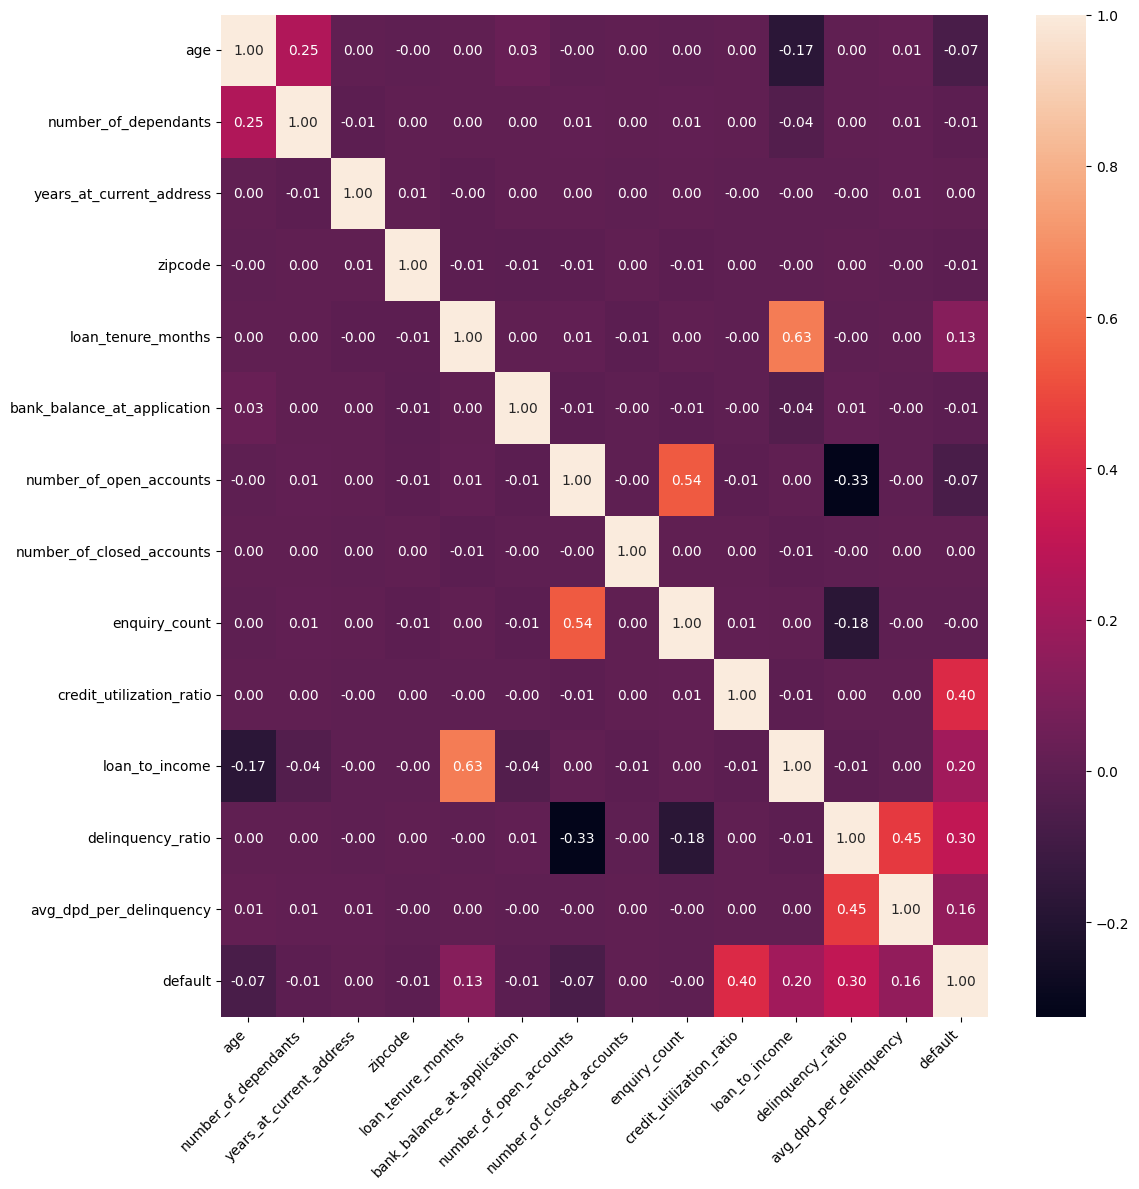

In [92]:
plt.figure(figsize=(12,12))
cm = df_train_3[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [108]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
    grouped['bad']=grouped['total']-grouped['good']

    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()

    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad
    grouped['woe'] = np.log(grouped['good_pct'] / grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] - grouped['bad_pct']) * grouped['woe']

    return grouped, grouped['iv'].sum()

In [109]:
grouped, total_iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), 'loan_purpose', 'default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7437,314,7123,0.10,0.21,-0.75,0.08
Education,5626,546,5080,0.17,0.15,0.14,0.00
Home,11271,1744,9527,0.55,0.28,0.68,0.18
Personal,13153,585,12568,0.18,0.37,-0.69,0.13


In [111]:
iv_values = {}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), feature, 'default' )
    else:
        X_binned = pd.cut(X_train_1[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train],axis=1), feature, 'default' )
    iv_values[feature] = iv

iv_values

{'age': np.float64(0.07592687127752061),
 'gender': np.float64(0.000482276463421216),
 'marital_status': np.float64(0.002196681370832318),
 'employment_status': np.float64(0.002447818101774487),
 'number_of_dependants': np.float64(0.00364589452118596),
 'residence_type': np.float64(0.2594019617563985),
 'years_at_current_address': np.float64(0.001042536380353028),
 'city': np.float64(0.000817870465334103),
 'state': np.float64(0.0007881984519711978),
 'zipcode': np.float64(0.0007436024782513755),
 'loan_purpose': np.float64(0.39377543144164784),
 'loan_type': np.float64(0.17304705897793143),
 'loan_tenure_months': np.float64(0.23450610202970526),
 'bank_balance_at_application': np.float64(0.004242001247914226),
 'number_of_open_accounts': np.float64(0.07324250836253295),
 'number_of_closed_accounts': np.float64(0.00026280824021760536),
 'enquiry_count': np.float64(0.005484982638303533),
 'credit_utilization_ratio': np.float64(2.4228228499400095),
 'loan_to_income': np.float64(0.4917403

In [113]:
iv_df = pd.DataFrame(list(iv_values.items()), columns=['feature', 'iv'])
iv_df

,feature,iv
0,age,0.08
1,gender,0.00
2,marital_status,0.00
3,employment_status,0.00
4,number_of_dependants,0.00
5,residence_type,0.26
6,years_at_current_address,0.00
7,city,0.00
8,state,0.00
9,zipcode,0.00


In [114]:
selected_features = iv_df[iv_df['iv'] > 0.02]['feature'].values
selected_features

array(['age', 'residence_type', 'loan_purpose', 'loan_type',
       'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'], dtype=object)

## Feature Encoding

In [115]:
X_train_reduced = X_train_1[selected_features]
X_test_reduced = X_test[selected_features]

In [116]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)

X_train_encoded.sample(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
45921,0.65,0.51,0.00,0.18,0.28,1.00,0.85,False,True,True,False,False,False
12552,0.52,0.17,0.33,0.62,0.17,0.00,0.00,True,False,False,False,False,False
37411,0.60,0.85,0.00,0.37,0.20,0.00,0.00,True,False,True,False,False,False


# Model Training

## Attempt 1
1. Logistic Regression, RandomForest, XGB
2. No handling of class imbalance

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.97      0.99      0.98     11390
        True       0.84      0.69      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



We want the classification report to much have higher recall for Defaulters

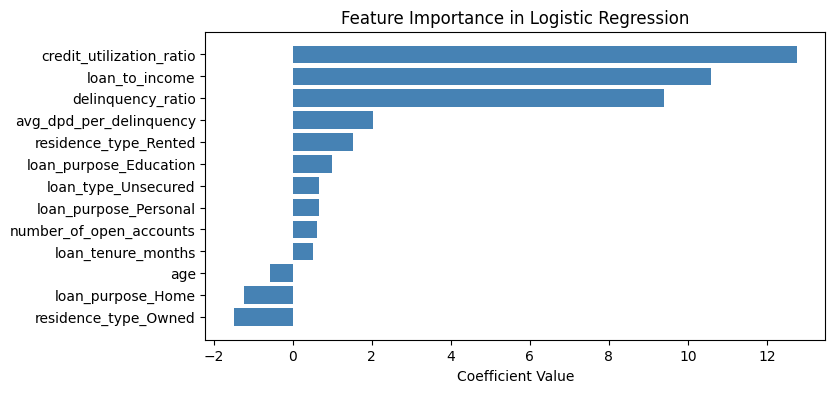

In [118]:
feature_importance = model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

In [119]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.97      0.99      0.98     11390
        True       0.84      0.70      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.91      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [120]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.97      0.98      0.98     11390
        True       0.81      0.73      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.89      0.86      0.87     12498
weighted avg       0.96      0.96      0.96     12498



Since there is not much difference between XGB and Logistic, we will choose LogisticRegression as a candidate for our RandomizedSearchCV candidate it has a better interpretation.

#### RandomizedSearch CV for Attempt 1: Logistic Regression

In [122]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'lbfgs', 'C': np.float64(1438.44988828766)}
Best Score: 0.7629851664889156
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.99      0.98     11390
        True       0.83      0.71      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.85      0.87     12498
weighted avg       0.96      0.96      0.96     12498



#### RandomizedSearch CV for Attempt 1: XGBoost

In [123]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 1.0, 'reg_alpha': 5.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Score: 0.7918102127274614
Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.98      0.98     11390
        True       0.77      0.82      0.80      1108

    accuracy                           0.96     12498
   macro avg       0.88      0.90      0.89     12498
weighted avg       0.96      0.96      0.96     12498



### Attempt 2

1. Logistic Regression & XGB
1. Handle Class Imbalance Using Under Sampling

In [126]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train_encoded, y_train)
y_train_res.value_counts()

default
False    3189
True     3189
Name: count, dtype: int64

In [127]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.99      0.92      0.96     11390
        True       0.53      0.95      0.68      1108

    accuracy                           0.92     12498
   macro avg       0.76      0.93      0.82     12498
weighted avg       0.95      0.92      0.93     12498



We get much higher recall, but much lower precision.

In [128]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       1.00      0.91      0.95     11390
        True       0.51      0.98      0.68      1108

    accuracy                           0.92     12498
   macro avg       0.76      0.95      0.81     12498
weighted avg       0.96      0.92      0.93     12498



### Attempt 3

1. Logistic Regression
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tunning using optuna

In [129]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_encoded, y_train)
y_train_smt.value_counts()

default
False    34225
True     34225
Name: count, dtype: int64

In [130]:
model = LogisticRegression()
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.99      0.93      0.96     11390
        True       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.83     12498
weighted avg       0.96      0.93      0.94     12498



In [132]:
# Attempt 3: logistic regression with SMOTE Tomek and Optuna

import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

/Users/abidtalukder/Documents/codeBasics/ml/projects/credit-risk-modeling/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [133]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }

    model = LogisticRegression(**param, max_iter=10000)

    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)

    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2025-04-17 00:49:02,450] A new study created in memory with name: no-name-1590e3e1-b0e4-43eb-843b-695079f77237
[I 2025-04-17 00:49:03,686] Trial 0 finished with value: 0.9407556988969784 and parameters: {'C': 0.12383591025427176, 'solver': 'lbfgs', 'tol': 2.5065656457021007e-05, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9407556988969784.
[I 2025-04-17 00:49:04,297] Trial 1 finished with value: 0.9375270045657239 and parameters: {'C': 0.05470567118497375, 'solver': 'newton-cg', 'tol': 1.6033806515763246e-05, 'class_weight': None}. Best is trial 0 with value: 0.9407556988969784.
[I 2025-04-17 00:49:04,899] Trial 2 finished with value: 0.8919195347022075 and parameters: {'C': 0.0007217567845367748, 'solver': 'newton-cg', 'tol': 8.430895001221034e-06, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9407556988969784.
[I 2025-04-17 00:49:05,535] Trial 3 finished with value: 0.9210212992210435 and parameters: {'C': 0.004009678601350465, 'solver': 'saga', 'tol': 

In [134]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9450514410127449
  Params: 
    C: 36.266969530058304
    solver: liblinear
    tol: 0.027668678715207888
    class_weight: None
              precision    recall  f1-score   support

       False       0.99      0.93      0.96     11390
        True       0.56      0.94      0.70      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.83     12498
weighted avg       0.96      0.93      0.94     12498



In [135]:
# Attempt 4: XGBoost with SMOTE Tomek and Optuna
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)

    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)

    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-04-17 00:50:45,613] A new study created in memory with name: no-name-299dde4f-d680-4ebf-acb6-c952b458c88d
[I 2025-04-17 00:50:45,981] Trial 0 finished with value: 0.9190521614135041 and parameters: {'lambda': 0.03716736876365681, 'alpha': 1.0599452971367336, 'subsample': 0.6972118693508689, 'colsample_bytree': 0.6518784217938273, 'max_depth': 5, 'eta': 0.028602556218258884, 'gamma': 2.7597247094092903, 'scale_pos_weight': 4.128004340879112, 'min_child_weight': 3, 'max_delta_step': 0}. Best is trial 0 with value: 0.9190521614135041.
[I 2025-04-17 00:50:46,381] Trial 1 finished with value: 0.9567862073701067 and parameters: {'lambda': 7.7413525674297246, 'alpha': 0.029535325102310436, 'subsample': 0.879550115234699, 'colsample_bytree': 0.7363296172100645, 'max_depth': 6, 'eta': 0.09747843253013848, 'gamma': 5.416671918769964, 'scale_pos_weight': 5.3246900697098125, 'min_child_weight': 4, 'max_delta_step': 9}. Best is trial 1 with value: 0.9567862073701067.
[I 2025-04-17 00:50:46,

In [136]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9745717822397074
  Params: 
    lambda: 0.4384403687826375
    alpha: 1.254444380185478
    subsample: 0.8847511774553789
    colsample_bytree: 0.5377999887797187
    max_depth: 10
    eta: 0.28454989036718903
    gamma: 1.35699130560993
    scale_pos_weight: 2.7036074671266848
    min_child_weight: 10
    max_delta_step: 1
              precision    recall  f1-score   support

       False       0.99      0.96      0.98     11390
        True       0.70      0.87      0.78      1108

    accuracy                           0.96     12498
   macro avg       0.85      0.92      0.88     12498
weighted avg       0.96      0.96      0.96     12498



In [137]:
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.99      0.93      0.96     11390
        True       0.56      0.94      0.70      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.83     12498
weighted avg       0.96      0.93      0.94     12498



#### Model Evaluation with ROC and AUC Scores

In [138]:
from sklearn.metrics import roc_curve

probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

fpr[:5], tpr[:5], thresholds[:5]

(array([0.       , 0.       , 0.       , 0.0000878, 0.0000878]),
 array([0.        , 0.00090253, 0.20577617, 0.20577617, 0.23375451]),
 array([       inf, 0.99999976, 0.99806766, 0.99806107, 0.99733898]))

In [139]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area

np.float64(0.9829942187554475)

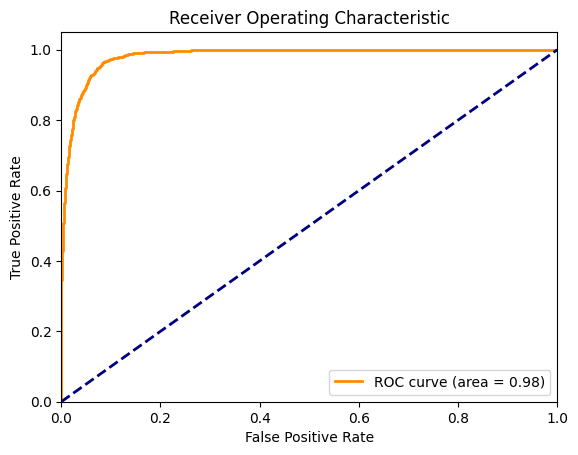

In [140]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()